In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery_Final.csv')
df_ROS[:2]

,Unnamed: 0,환자ID,연령,성별,Large Lymphocyte,우울증여부,종양진행여부,재발여부,디스크단면적,디스크위치,척추이동척도,척추전방위증,수술시간,수술실패여부,수술기법,흡연여부,Instability,혈액형
0,0,1PT,66,2,22.8,0,0,0,2048.5,4,Down,0,68.0,0,TELD,0,0,RH+A
1,1,2PT,47,1,44.9,0,0,0,1753.1,4,Up,0,31.0,0,TELD,0,0,RH+A


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1758 non-null   int64  
 1   환자ID              1758 non-null   object 
 2   신장                1758 non-null   int64  
 3   체중                1758 non-null   float64
 4   연령                1758 non-null   int64  
 5   성별                1758 non-null   int64  
 6   Large Lymphocyte  1758 non-null   float64
 7   우울증여부             1758 non-null   int64  
 8   종양진행여부            1758 non-null   int64  
 9   재발여부              1758 non-null   int64  
 10  디스크단면적            1758 non-null   float64
 11  디스크위치             1758 non-null   int64  
 12  척추이동척도            1758 non-null   object 
 13  척추전방위증            1758 non-null   int64  
 14  수술시간              1758 non-null   float64
 15  수술실패여부            1758 non-null   int64  
 16  수술기법              1758 non-null   object 


### quest (DDA) 
- 목표변수: 입원기간
- 하단의 주어진 변수들을 사용해서 목적변수(입원기간)를 예측하고, 각 변수의 기여도 및 차이를 분석하려 함. 
- 데이터타입
    1. 연속형
    2. 범주형 :'입원기간','성별','우울증여부','종양진행여부','재발여부','척추전방위증','수술실패여부','흡연여부'

- 설명변수
    - 신장과 체중 : 환자의 생체 특성을 나타내는 변수이며, 입원기간에 영향을 미칠 가능성이 있다고 봄 
    - 연령과 성별 :  환자의 나이와 성별은 건강 상태 및 치료에 영향을 줄 수 있는 중요한 변수임
    - Large Lymphocyte: 혈액 내의 특정 세포 유형을 나타내는 변수로, 면역 상태 등에 영향을 줄 수 있음
    - 우울증여부, 종양진행여부, 재발여부 : 환자의 건강 상태 및 진단 정보를 나타내는 변수임
    - 디스크단면적과 디스크위치: 환자의 척추 건강과 관련된 변수로 입원기간에 영향을 줄 수 있음 
    - 척추이동척도와 척추전방위증: 척추의 이동과 관련된 변수로 선택에 포함 
    - 수술시간, 수술실패여부, 수술기법 : 환자의 수술 관련 변수
    - 흡연여부 : 환자의 생활 습관을 나타내는 변수 
    - Instability : 척추의 불안정성을 나타내는 변수
    - 혈액형 : 혈액 그룹은 환자의 생체 특성을 나타내는 변수  
    
- 담당부분
    - '입원기간','성별','우울증여부','종양진행여부','재발여부','척추전방위증','수술실패여부','흡연여부'

In [4]:
df_ROS_Analysis = df_ROS[['환자ID','신장', '체중', '연령', '성별', 'Large Lymphocyte', '우울증여부', '종양진행여부', '재발여부','디스크단면적','디스크위치', '척추이동척도','척추전방위증','수술시간','수술실패여부','수술기법','흡연여부','Instability','혈액형','입원기간']]

In [5]:
df_ROS_Analysis.isnull().sum()

환자ID                0
신장                  0
체중                  0
연령                  0
성별                  0
Large Lymphocyte    0
우울증여부               0
종양진행여부              0
재발여부                0
디스크단면적              0
디스크위치               0
척추이동척도              0
척추전방위증              0
수술시간                0
수술실패여부              0
수술기법                0
흡연여부                0
Instability         0
혈액형                 0
입원기간                0
dtype: int64

In [6]:
df_ROS_Analysis=df_ROS_Analysis.dropna().copy()

In [7]:
df_ROS_Analysis.to_csv('../../datasets/RecurrenceOfSurgery_Final.csv')

### 담당 부분 
'입원기간','성별','우울증여부','종양진행여부','재발여부','척추전방위증','수술실패여부','흡연여부'

In [8]:
df_ROS_Analysis = df_ROS[['입원기간','성별','우울증여부','종양진행여부','재발여부','척추전방위증','수술실패여부','흡연여부']]
df_ROS_Analysis[:2]

,입원기간,성별,우울증여부,종양진행여부,재발여부,척추전방위증,수술실패여부,흡연여부
0,2,2,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0


In [9]:
df_ROS_Analysis.describe()

,입원기간,성별,우울증여부,종양진행여부,재발여부,척추전방위증,수술실패여부,흡연여부
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,1.651308,1.377702,0.025028,0.002844,0.115472,0.030717,0.061433,0.215017
std,1.893471,0.484950,0.159857,0.053270,0.319682,0.172598,0.240192,0.410951
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 데이터 타입 확인
- 범주형: '성별', '우울증 여부', '종양진행여부', '재발여부', '척추전방위증', '수술실패여부', '흡연여부'

In [10]:
df_ROS_Analysis.dtypes #데이터 타입 확인

입원기간      int64
성별        int64
우울증여부     int64
종양진행여부    int64
재발여부      int64
척추전방위증    int64
수술실패여부    int64
흡연여부      int64
dtype: object

####   타입 변경  = 성별,우울증여부, 종양진행여부, 재발여부, 척추전방위증, 수술실패여부, 흡연여부

In [16]:
# 성별,우울증여부, 종양진행여부, 재발여부, 척추전방위증, 수술실패여부, 흡연여부 타입 변경 
df_ROS_Analysis[['성별','우울증여부', '종양진행여부','재발여부', '수술실패여부', '흡연여부']] = df_ROS_Analysis[['성별','우울증여부', '종양진행여부','재발여부', '수술실패여부', '흡연여부']].astype(object)

C:\Users\5-20\AppData\Local\Temp\ipykernel_10216\1532712258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_Analysis[['성별','우울증여부', '종양진행여부','재발여부', '수술실패여부', '흡연여부']] = df_ROS_Analysis[['성별','우울증여부', '종양진행여부','재발여부', '수술실패여부', '흡연여부']].astype(object)


In [17]:
df_ROS_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   입원기간    1758 non-null   int64 
 1   성별      1758 non-null   object
 2   우울증여부   1758 non-null   object
 3   종양진행여부  1758 non-null   object
 4   재발여부    1758 non-null   object
 5   척추전방위증  1758 non-null   int64 
 6   수술실패여부  1758 non-null   object
 7   흡연여부    1758 non-null   object
dtypes: int64(2), object(6)
memory usage: 110.0+ KB


In [18]:
df_ROS_Analysis.describe()[:2] # 범주형

,입원기간,척추전방위증
count,1758.000000,1758.000000
mean,1.651308,0.030717


### 입원기간 여부 시각화 확인 

In [19]:
df_ROS_Analysis['입원기간'].describe()

count    1758.000000
mean        1.651308
std         1.893471
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: 입원기간, dtype: float64

In [20]:
df_ROS_Analysis['입원기간'].value_counts()

1     1082
2      455
3      157
4       34
5        6
8        5
0        3
6        3
11       3
7        3
46       1
17       1
9        1
18       1
16       1
44       1
12       1
Name: 입원기간, dtype: int64

In [21]:
#df_ROS['입원기간'].mean() #1.7365364308342133
#df_ROS['입원기간'].min() #0일  = 당일 퇴원 
#df_ROS['입원기간'].median() # 입원기간의 중앙값 #1.0
df_ROS_Analysis['입원기간'].max() # 46일

46

<Axes: xlabel='입원기간'>

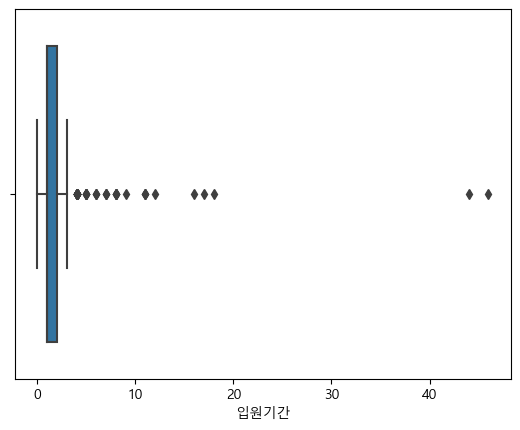

In [22]:
sns.boxplot(data=df_ROS_Analysis,x='입원기간')

<Axes: xlabel='입원기간', ylabel='count'>

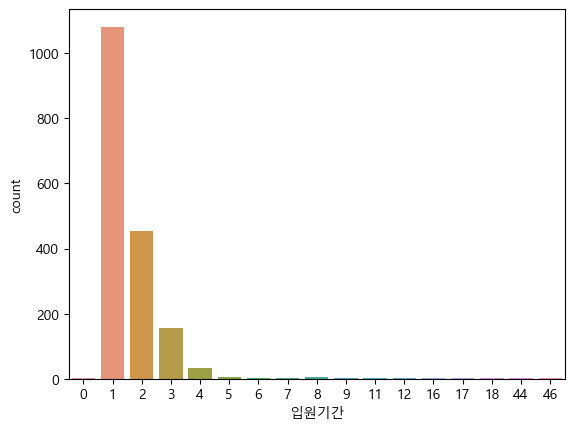

In [23]:
sns.countplot(data=df_ROS_Analysis,x='입원기간')

### 1.성별과 입원기간
- 범주형

In [67]:
df_Sex = df_ROS_Analysis[['입원기간', '성별']]
df_Sex

,입원기간,성별
0,2,2
1,1,1
2,1,1
3,1,1
4,2,1
...,...,...
1753,12,2
1754,2,1
1755,3,1
1756,3,1


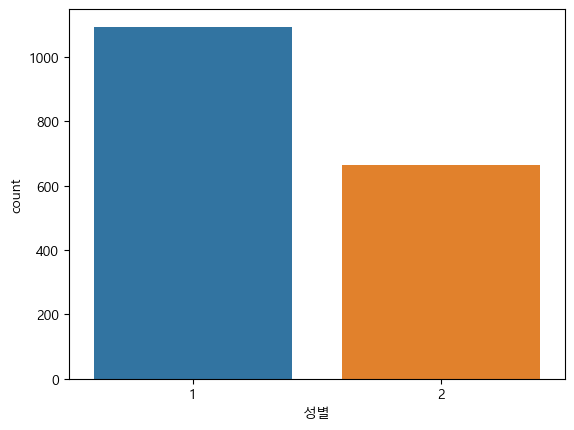

In [71]:
# 성별에 따른 환자 분류 1(남자)/ 2(여자)
sex_chart = sns.countplot(data=df_Sex, x='성별')

In [72]:
# 전체 환자의 입원기간 평균
df_ROS_Analysis['입원기간'].mean()

1.6513083048919226

In [73]:
# 성별여부에 따른 입원 기간 평균 비교 
average = df_Sex.groupby('성별')['입원기간'].mean()
average

성별
1    1.605119
2    1.727410
Name: 입원기간, dtype: float64

### 2.우울증(depression)여부와 입원기간
- 범주형

In [44]:
df_depr = df_ROS_Analysis[['입원기간', '우울증여부']]
df_depr

,입원기간,우울증여부
0,2,0
1,1,0
2,1,0
3,1,0
4,2,0
...,...,...
1753,12,0
1754,2,0
1755,3,0
1756,3,0


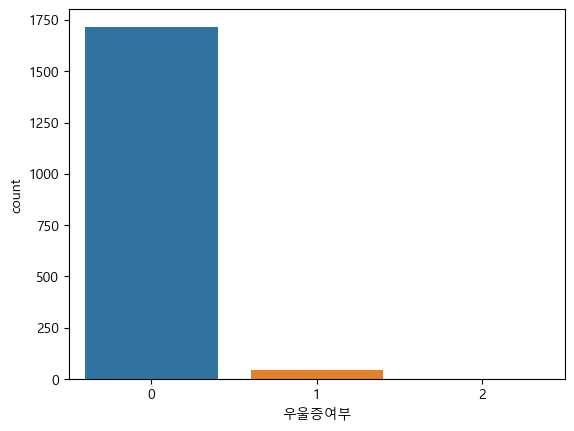

In [45]:
# 우울증여부에 따른 환자 분류
depression_chart = sns.countplot(data=df_depr, x='우울증여부')

In [46]:
# 우울증여부에 따른 입원 기간 평균 비교  0(우울증 없음) VS 1(우울증 있음) 
average = df_depr.groupby('우울증여부')['입원기간'].mean()
average

우울증여부
0    1.655977
1    1.476190
2    1.000000
Name: 입원기간, dtype: float64

#### 3. 종양진행여부 입원기간
- 범주형

In [47]:
df_tumor = df_ROS_Analysis[['종양진행여부', '입원기간']]
df_tumor

,종양진행여부,입원기간
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
1753,0,12
1754,0,2
1755,0,3
1756,0,3


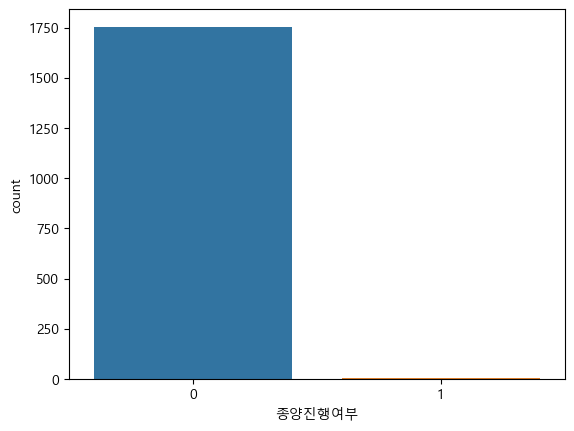

In [50]:
# 종양진행여부에  따른 환자 분류
tumor_chart = sns.countplot(data=df_tumor , x='종양진행여부')

In [51]:
# 종양진행여부에 따른 입원 기간 평균 비교
tumor_average = df_tumor.groupby('종양진행여부')['입원기간'].mean()
tumor_average

종양진행여부
0    1.650314
1    2.000000
Name: 입원기간, dtype: float64

#### 4. 재발(recurrence)여부와 입원기간
- 범주형

In [52]:
df_rec = df_ROS_Analysis[['재발여부', '입원기간']]
df_rec

,재발여부,입원기간
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
1753,0,12
1754,0,2
1755,0,3
1756,0,3


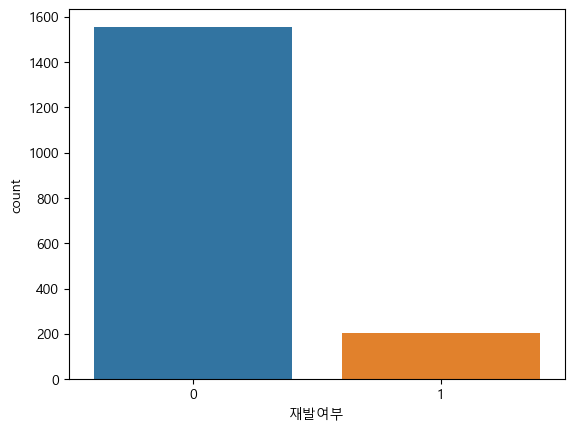

In [53]:
recurrence_chart = sns.countplot(data=df_rec, x='재발여부')

In [54]:
# 재발여부 따른 평균 입원기간 
recurrence_average = df_rec.groupby('재발여부')['입원기간'].mean()
recurrence_average

재발여부
0    1.666238
1    1.536946
Name: 입원기간, dtype: float64

### 5. 척추전방위증(spondylolisthesis) 입원기간
- 범주형

In [56]:
df_spo = df_ROS_Analysis[['척추전방위증', '입원기간']]
df_spo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   척추전방위증  1758 non-null   int64
 1   입원기간    1758 non-null   int64
dtypes: int64(2)
memory usage: 27.6 KB


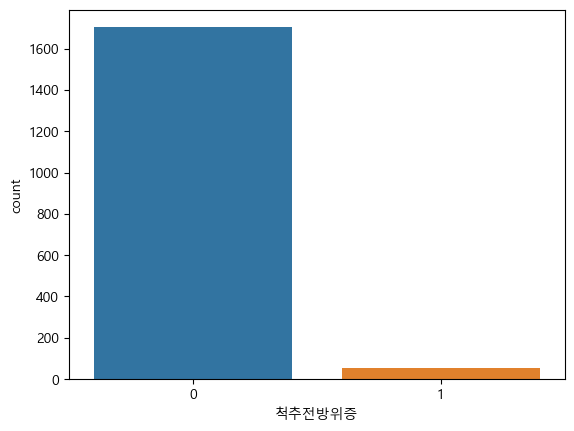

In [57]:
# 심혈관질환 따른 환자 분류
spo_chart = sns.countplot(data=df_spo, x='척추전방위증')


In [58]:
# 척추전방위증 여부에 따른 환자 입원기간 평균
spo_average = df_spo.groupby('척추전방위증')['입원기간'].mean()
spo_average

척추전방위증
0    1.649061
1    1.722222
Name: 입원기간, dtype: float64

### 6. 수술실패(operation failure)여부와 입원기간
- 범주형

In [59]:
df_Of = df_ROS_Analysis[['수술실패여부', '입원기간']]
df_Of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수술실패여부  1758 non-null   object
 1   입원기간    1758 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.6+ KB


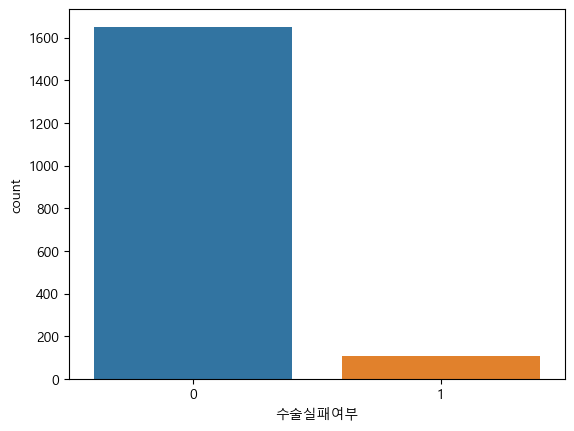

In [60]:
# 스테로이드치료 여부에 따른 환자 분류
operation_chart = sns.countplot(data=df_Of, x='수술실패여부')

In [61]:
# 수술실패 여부에 따른 입원 기간 평균 비교
average = df_Of.groupby('수술실패여부')['입원기간'].mean()
average

수술실패여부
0    1.647879
1    1.703704
Name: 입원기간, dtype: float64

### 6. 흡연여부(smoking) 입원기간
- 범주형

In [64]:
df_Smo= df_ROS_Analysis[['입원기간', '흡연여부']]
df_Smo

,입원기간,흡연여부
0,2,0
1,1,0
2,1,0
3,1,0
4,2,0
...,...,...
1753,12,0
1754,2,1
1755,3,1
1756,3,0


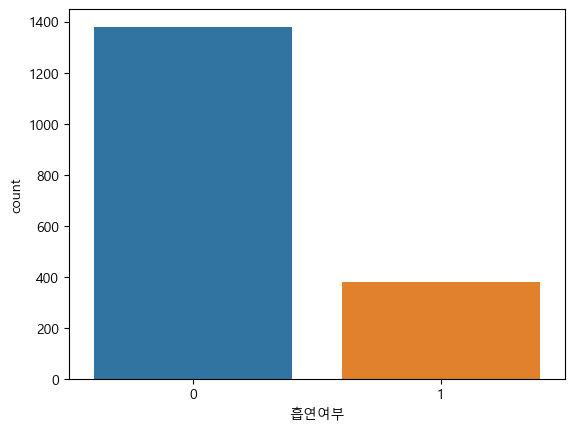

In [65]:
# 흡연 여부에 따른 환자 분류
smoking_chart = sns.countplot(data=df_Smo, x='흡연여부')

In [66]:
# 흡연 여부에 따른 입원 기간 평균 비교
average = df_Smo.groupby('흡연여부')['입원기간'].mean()
average

흡연여부
0    1.635507
1    1.708995
Name: 입원기간, dtype: float64